In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from bin.utils import iterate_fasta, barplot, plot_logo
from Bio import SeqIO
import logomaker
from abnumber import Chain

%config InlineBackend.figure_format = 'retina'

# Extracting Thera-SAbDab subsets

In [28]:
def get_mab_suffix(name):
    for suffix in ['axomab', 'xizumab','zumab', 'ximab', 'amab', 'emab', 'imab', 'omab', 'umab', 'vetmab', 'fusp']:
        if name.endswith(suffix):
            return '-'+suffix
    return 'other'

In [29]:
mabs = pd.read_csv('../../data/sabdab/TheraSAbDab_downloaded.csv', na_values=['na']).dropna(subset=['Therapeutic']).set_index('Therapeutic', verify_integrity=True)

# remove columns with only nans
mabs = mabs.loc[:,(~mabs.isna()).any()]

# extract suffix
mabs.insert(1, 'Suffix', mabs.index.map(get_mab_suffix))

with pd.option_context('display.max_columns', 100):
    display(mabs.head())

,Format,Suffix,CH1 Isotype,VD LC,Highest_Clin_Trial (Jan '20),Est. Status,Heavy Sequence,Light Sequence,Heavy Sequence (if bispec),Light Sequence (if bispec),100% SI Structure,99% SI Structure,95-98% SI Structure,Year Proposed,Year Recommended,Target,Companies,Conditions Approved,Conditions Active,Conditions Discontinued,Development Tech,Notes
Therapeutic,,,,,,,,,,,,,,,,,,,,,,
Abagovomab,Whole mAb,-omab,G1,Kappa,Phase-III,Discontinued,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,NaN,NaN,None,None,None,2006,2007.0,CA125,Menarini,NaN,NaN,Ovarian cancer;Pancreatic cancer,NaN,NaN
Abelacimab,Whole mAb,-imab,G1,Lambda,Unknown,Unknown,QVQLLESGGGLVQPGGSLRLSCAASGFTFSTAAMSWVRQAPGKGLE...,QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNDVSWYQQLPGTAPK...,NaN,NaN,None,None,6r8x:CB,2018,2019.0,F11,Novartis,NaN,Thromboembolism,NaN,NaN,NaN
Abituzumab,Whole mAb,-zumab,G2,Kappa,Phase-II,Active,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,NaN,NaN,None,None,None,2013,2014.0,ITGAV,Merck,NaN,Systemic scleroderma,Colorectal cancer;Ovarian cancer;Prostate canc...,NaN,"4o02 claims to be abituzumab (17E6), but is not"
Abrezekimab,Fab,-imab,G1,Kappa,Phase-I,Discontinued,QVTLKESGPVLVKPTETLTLTCTVSGFSLTNYHVQWIRQPPGKALE...,DIQMTQSPSSLSASVGDRVTITCLASEDISNYLAWYQQKPGKAPKL...,NaN,NaN,None,None,None,2017,2018.0,IL13,UCB,NaN,NaN,Asthma,NaN,NaN
Abrilumab,Whole mAb,-umab,G2,Kappa,Phase-II,Discontinued,QVQLVQSGAEVKKPGASVKVSCKVSGYTLSDLSIHWVRQAPGKGLE...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQQKPGKAPKL...,NaN,NaN,None,None,None,2014,2015.0,α4β7,Amgen;AstraZeneca,NaN,NaN,Crohn's disease;Ulcerative colitis,NaN,NaN


In [30]:
mabs.to_csv('../../data/sabdab/TheraSAbDab_clean.tsv', sep='\t')

In [31]:
mabs.sort_values('Year Proposed').tail()

,Format,Suffix,CH1 Isotype,VD LC,Highest_Clin_Trial (Jan '20),Est. Status,Heavy Sequence,Light Sequence,Heavy Sequence (if bispec),Light Sequence (if bispec),...,95-98% SI Structure,Year Proposed,Year Recommended,Target,Companies,Conditions Approved,Conditions Active,Conditions Discontinued,Development Tech,Notes
Therapeutic,,,,,,,,,,,,,,,,,,,,,
Idactamab,Whole mAb,-amab,G1,Kappa,TBC,Active,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...,DIQMTQSPSTLSASVGDRVTITCRASQSIRSWLAWYQQKPGKAPKL...,NaN,NaN,...,None,2020,NaN,SLC1A5,TBC,TBC,TBC,TBC,NaN,NaN
Grisnilimab,Whole mAb,-imab,G2a,Lambda,TBC,Active,QIQLVQSGPELKKPGETVKISCKASGYTFTNYGMNWVKQAPGKGLM...,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,NaN,NaN,...,None,2020,NaN,CD7,TBC,TBC,TBC,TBC,NaN,NaN
Dafsolimab,Whole mAb,-imab,G2b,Kappa,TBC,Active,QVQLQQSGAELARPGASVKMSCKASGYTFTSYTMHWVKQRPGQGLE...,QIVLTQSPAIMSASPGEKVTMTCSASSSVSYMHWYQQKSGTSPKRW...,NaN,NaN,...,None,2020,NaN,CD3E,TBC,TBC,TBC,TBC,NaN,NaN
Garivulimab,Whole mAb,-imab,G1,Kappa,TBC,Active,EVQLVESGGGLVQPGGSLRLSCAVSGFSLTSYGVHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCKASQDVGIVVAWYQQKPGKAPKL...,NaN,NaN,...,None,2020,NaN,CD274,TBC,TBC,TBC,TBC,NaN,NaN
Apitegromab,Whole mAb,-omab,G4,Lambda,TBC,Active,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...,QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNTVHWYQQLPGTAPK...,NaN,NaN,...,6umx:hl,2020,NaN,pro-GDF-8,TBC,TBC,TBC,TBC,NaN,NaN


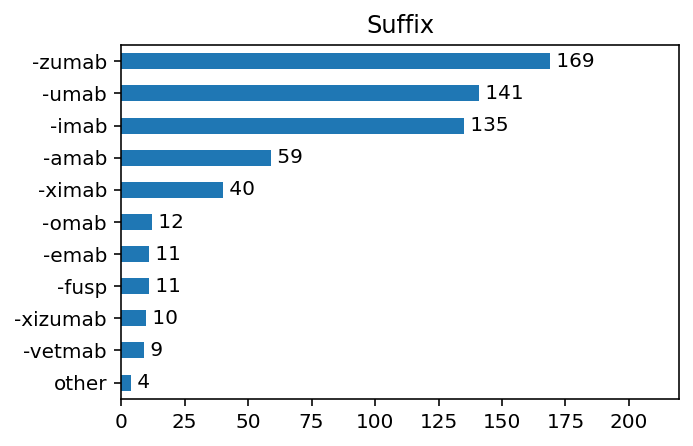

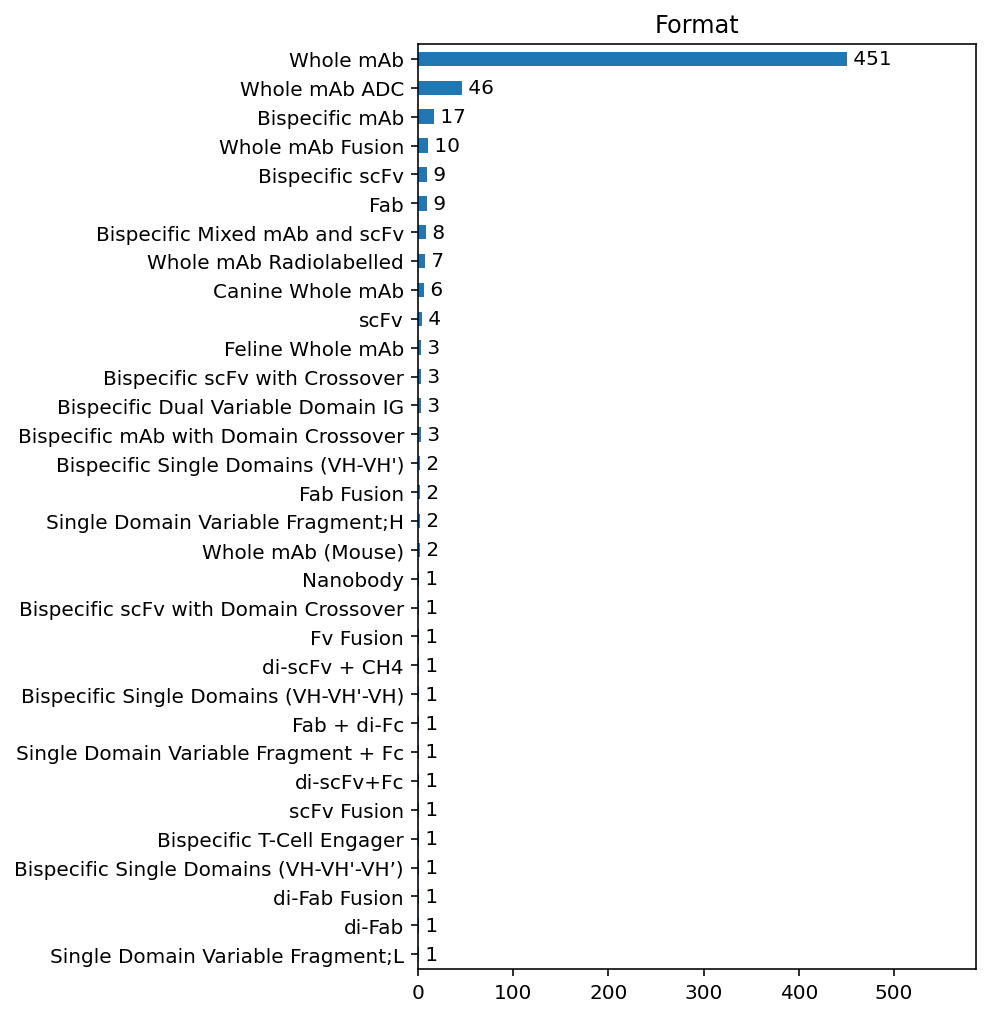

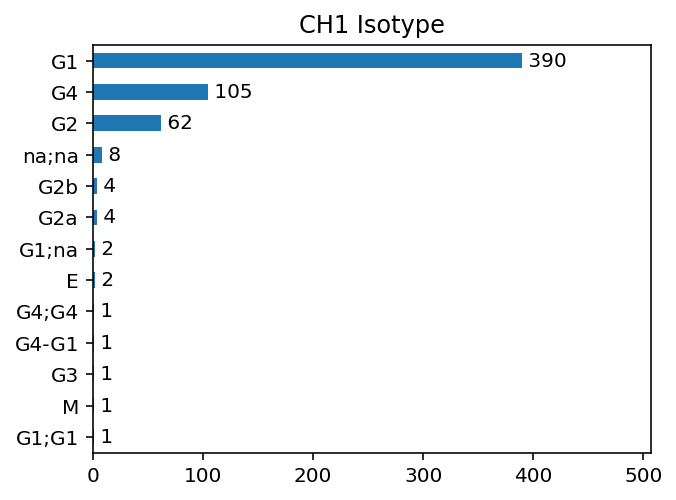

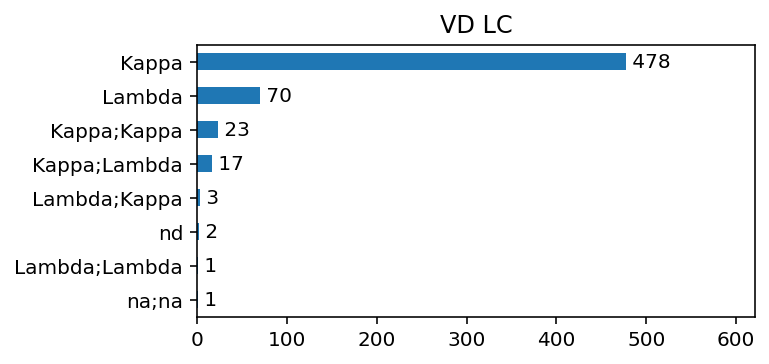

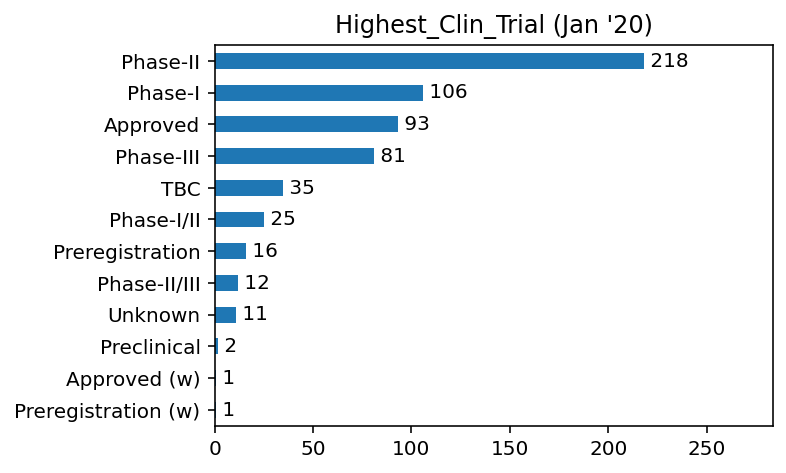

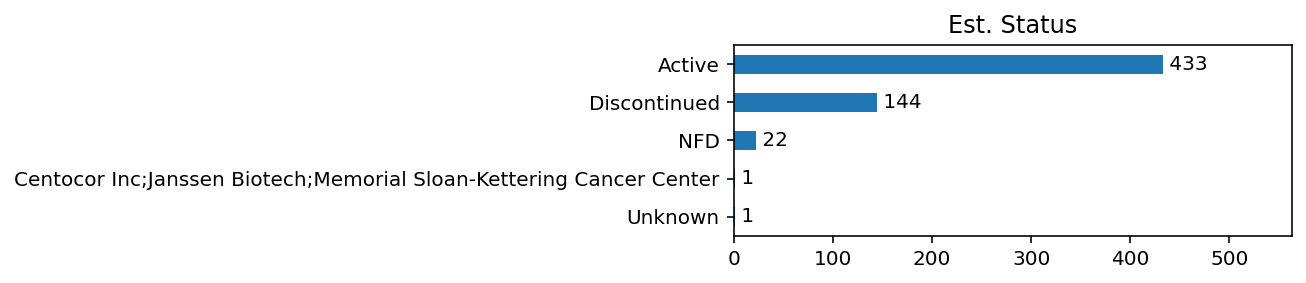

In [32]:
for field in ['Suffix', 'Format', 'CH1 Isotype', 'VD LC', 'Highest_Clin_Trial (Jan \'20)', 'Est. Status']:
    counts = mabs[field].value_counts()
    barplot(counts, figsize=(5, 0.5+len(counts)*0.25))
    plt.show()

In [33]:
mabs[mabs['Suffix'] == 'other']['Year Proposed'].sort_values()

Therapeutic
Muromonab      1988
PankoMab       2016
Garetosmab     2018
Isecarosmab    2019
Name: Year Proposed, dtype: int64

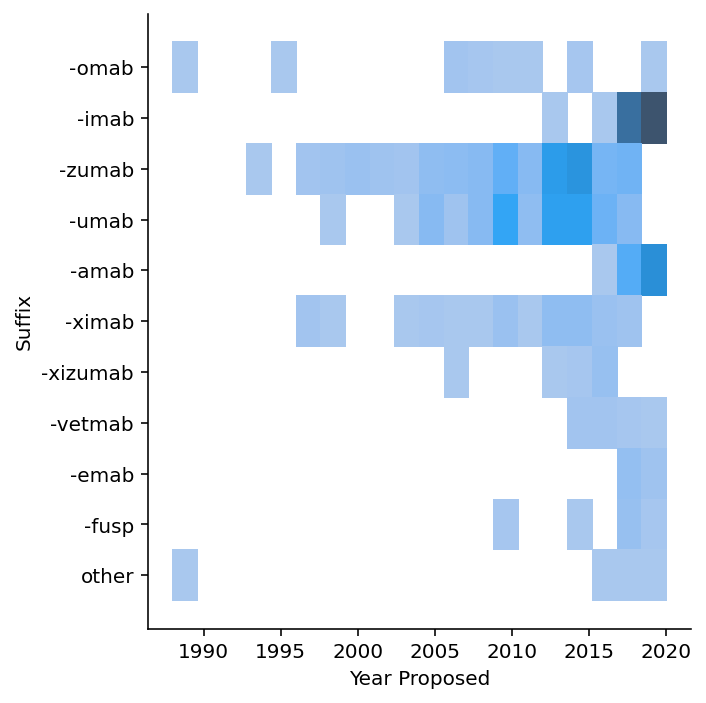

In [34]:
sns.displot(data=mabs, x='Year Proposed', y='Suffix');

# Parsing chains

In [4]:
seqs = mabs[['Heavy Sequence', 'Light Sequence']].dropna()
len(seqs)

592

In [5]:
heavy_chains = seqs.apply(lambda row: Chain(row['Heavy Sequence'], name=row.name, scheme='imgt'), axis=1)
heavy_chains.iloc[0]

QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS
                         ^^^^^^^^                 ^^^^^^^^                                      ^^^^^^^^^^^^           

In [6]:
light_chains = seqs.apply(lambda row: Chain(row['Light Sequence'], name=row.name, scheme='imgt'), axis=1)
light_chains.iloc[0]

DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQLLVYNAKTLAGGVSSRFSGSGSGTHFSLKIKSLQPEDFGIYYCQHHYGILPTFGGGTKLEIK
                          ^^^^^^                 ^^^                                    ^^^^^^^^^          

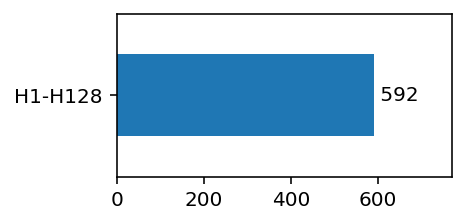

In [16]:
barplot(heavy_chains.apply(lambda c: f'{list(c.positions)[0]}-{list(c.positions)[-1]}').value_counts(), figsize=(3, 1.5));

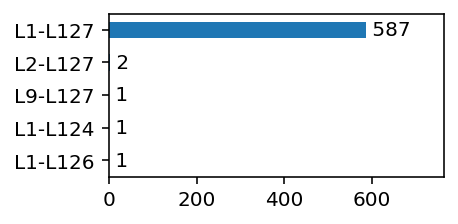

In [17]:
barplot(light_chains.apply(lambda c: f'{list(c.positions)[0]}-{list(c.positions)[-1]}').value_counts(), figsize=(3, 1.5));

# Humanized sequences

In [103]:
HUMANIZED_DIR = '../../data/tasks/therapeutic_rediscovery/thera'

In [104]:
humanized_seqs = mabs[mabs['Suffix'].isin(['-zumab'])].copy()
humanized_seqs = humanized_seqs.dropna(subset=['Heavy Sequence','Light Sequence'])

len(humanized_seqs)

164

In [105]:
humanized_heavy_chains = humanized_seqs.apply(lambda row: Chain(row['Heavy Sequence'], name=row.name, scheme='imgt'), axis=1)
humanized_heavy_chains[0]

QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLEWIGYINPRSGYTEYNEIFRDKATMTTDTSTSTAYMELSSLRSEDTAVYYCASFLGRGAMDYWGQGTTVTVSS
                         ^^^^^^^^                 ^^^^^^^^                                      ^^^^^^^^^^^           

In [106]:
humanized_light_chains = humanized_seqs.apply(lambda row: Chain(row['Light Sequence'], name=row.name, scheme='imgt'), axis=1)
humanized_light_chains[0]

DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKLLIYYTSKIHSGVPSRFSGSGSGTDYTFTISSLQPEDIATYYCQQGNTFPYTFGQGTKVEIK
                          ^^^^^^                 ^^^                                    ^^^^^^^^^          

In [107]:
humanized_light_chains.index

Index(['Abituzumab', 'Afutuzumab', 'Alacizumab', 'Alemtuzumab', 'Anrukinzumab',
       'Atezolizumab', 'Bapineuzumab', 'Bemarituzumab', 'Benralizumab',
       'Bevacizumab',
       ...
       'Vanucizumab', 'Vatelizumab', 'Vedolizumab', 'Veltuzumab',
       'Visilizumab', 'Vonlerolizumab', 'Vorsetuzumab', 'Vunakizumab',
       'Xentuzumab', 'Zenocutuzumab'],
      dtype='object', name='Therapeutic', length=164)

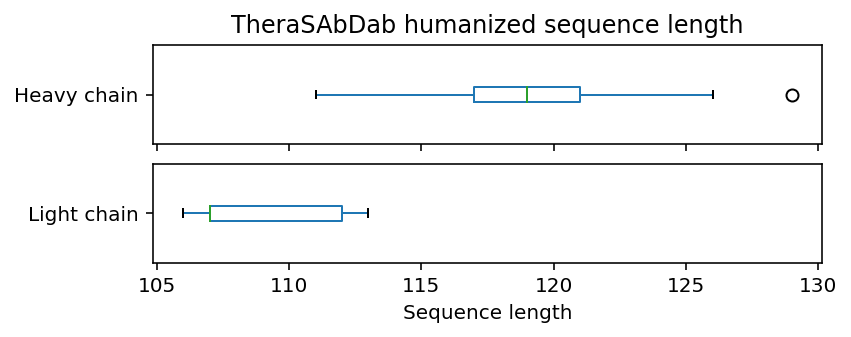

In [108]:
fig, ax = plt.subplots(2, figsize=(6, 2), sharex=True)
humanized_heavy_seq_len = humanized_heavy_chains.apply(len).rename('Heavy chain')
humanized_heavy_seq_len.plot.box(vert=False, ax=ax[0]);
humanized_light_seq_len = humanized_light_chains.apply(len).rename('Light chain')
humanized_light_seq_len.plot.box(vert=False, ax=ax[1]);
ax[1].set_xlabel('Sequence length');
ax[0].set_title('TheraSAbDab humanized sequence length');

In [109]:
!mkdir -p {HUMANIZED_DIR}

In [110]:
Chain.to_anarci_csv(humanized_heavy_chains, os.path.join(HUMANIZED_DIR, 'humanized_imgt_H.csv'))
Chain.to_anarci_csv(humanized_light_chains, os.path.join(HUMANIZED_DIR, 'humanized_imgt_KL.csv'))

In [111]:
Chain.to_fasta(humanized_heavy_chains, os.path.join(HUMANIZED_DIR, 'humanized_H.fa'))
Chain.to_fasta(humanized_light_chains, os.path.join(HUMANIZED_DIR, 'humanized_KL.fa'))

164

In [112]:
!head {HUMANIZED_DIR}/*

==> ../../data/tasks/therapeutic_rediscovery/thera/humanized_H.fa <==
>Abituzumab
QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLEWIGYINPRSGYTEYNEIFRDKATMTTDTSTSTAYMELSSLRSEDTAVYYCASFLGRGAMDYWGQGTTVTVSS
>Afutuzumab
QVQLVQSGAEVKKPGSSVKVSCKASGYAFSYSWINWVRQAPGQGLEWMGRIFPGDGDTDYNGKFKGRVTITADKSTSTAYMELSSLRSEDTAVYYCARNVFDGYWLVYWGQGTLVTVSS
>Alacizumab
EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYGMSWVRQAPGKGLEWVATITSGGSYTYYVDSVKGRFTISRDNAKNTLYLQMNSLRAEDTAVYYCVRIGEDALDYWGQGTLVTVSS
>Alemtuzumab
QVQLQESGPGLVRPSQTLSLTCTVSGFTFTDFYMNWVRQPPGRGLEWIGFIRDKAKGYTTEYNPSVKGRVTMLVDTSKNQFSLRLSSVTAADTAVYYCAREGHTAAPFDYWGQGSLVTVSS
>Anrukinzumab
EVQLVESGGGLVQPGGSLRLSCAASGFTFISYAMSWVRQAPGKGLEWVASISSGGNTYYPDSVKGRFTISRDNAKNSLYLQMNSLRAEDTAVYYCARLDGYYFGFAYWGQGTLVTVSS

==> ../../data/tasks/therapeutic_rediscovery/thera/humanized_imgt_H.csv <==
Id,chain_type,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,6